In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8a6343d9724072f19e4ad863aa1d635


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8a6343d9724072f19e4ad863aa1d635&q=Boston


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | bairiki
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | huarmey
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | maglod
Processing Record 11 of Set 1 | zabrani
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | dillon
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | bud
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | ar

Processing Record 37 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | nizhniy kuranakh
Processing Record 40 of Set 4 | madang
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | hoi an
Processing Record 44 of Set 4 | san jeronimo
Processing Record 45 of Set 4 | sussex
Processing Record 46 of Set 4 | jizan
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | upata
Processing Record 49 of Set 4 | pulsano
Processing Record 50 of Set 4 | santa cruz
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | sioux lookout
Processing Record 4 of Set 5 | ngunguru
Processing Record 5 of Set 5 | mocambique
City not found. Skipping...
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | lashio
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | havo

Processing Record 26 of Set 8 | asuncion
Processing Record 27 of Set 8 | ulefoss
Processing Record 28 of Set 8 | acapulco
Processing Record 29 of Set 8 | talant
Processing Record 30 of Set 8 | arlit
Processing Record 31 of Set 8 | puerto narino
Processing Record 32 of Set 8 | terbuny
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | gornyak
Processing Record 35 of Set 8 | harper
Processing Record 36 of Set 8 | balkhash
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | beaverlodge
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | monrovia
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | miandrivazo
Processing Record 43 of Set 8 | kimbe
Processing Record 44 of Set 8 | begoro
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | reyes
Processing Record 48 of Set 8 | udachnyy
Processing Record 49 of Set 8 | kazachinskoye
Processing Reco

Processing Record 17 of Set 12 | sinnamary
Processing Record 18 of Set 12 | auki
Processing Record 19 of Set 12 | khorramabad
Processing Record 20 of Set 12 | puerto escondido
Processing Record 21 of Set 12 | susangerd
Processing Record 22 of Set 12 | nurobod
Processing Record 23 of Set 12 | covington
Processing Record 24 of Set 12 | waipawa
Processing Record 25 of Set 12 | kulhudhuffushi
Processing Record 26 of Set 12 | zharkent
Processing Record 27 of Set 12 | hartford
Processing Record 28 of Set 12 | khorixas
Processing Record 29 of Set 12 | santiago del estero
Processing Record 30 of Set 12 | batagay
Processing Record 31 of Set 12 | marystown
Processing Record 32 of Set 12 | parana
Processing Record 33 of Set 12 | hihifo
City not found. Skipping...
Processing Record 34 of Set 12 | caraquet
Processing Record 35 of Set 12 | ugoofaaru
Processing Record 36 of Set 12 | damghan
Processing Record 37 of Set 12 | ranong
Processing Record 38 of Set 12 | tessalit
Processing Record 39 of Set 1

In [14]:
len(city_data)

575

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,69.39,82,82,13.73,RE,2022-05-17 03:11:27
1,Hobyo,5.3505,48.5268,79.34,81,4,23.09,SO,2022-05-17 03:15:27
2,Bairiki,1.3292,172.9752,87.80,66,40,11.50,KI,2022-05-17 03:15:28
3,Mataura,-46.1927,168.8643,54.48,84,100,5.32,NZ,2022-05-17 03:15:28
4,Huarmey,-10.0681,-78.1522,64.94,85,97,7.45,PE,2022-05-17 03:15:29
5,Severo-Kurilsk,50.6789,156.1250,43.03,79,20,6.71,RU,2022-05-17 03:15:30
6,Grindavik,63.8424,-22.4338,48.67,71,0,5.75,IS,2022-05-17 03:12:57
7,Ushuaia,-54.8000,-68.3000,40.66,87,75,3.44,AR,2022-05-17 03:11:31
8,Hasaki,35.7333,140.8333,66.29,82,100,16.20,JP,2022-05-17 03:11:31
9,Maglod,47.4426,19.3644,63.93,77,0,2.30,HU,2022-05-17 03:11:32


In [17]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-05-17 03:11:27,-21.3585,55.7679,69.39,82,82,13.73
1,Hobyo,SO,2022-05-17 03:15:27,5.3505,48.5268,79.34,81,4,23.09
2,Bairiki,KI,2022-05-17 03:15:28,1.3292,172.9752,87.80,66,40,11.50
3,Mataura,NZ,2022-05-17 03:15:28,-46.1927,168.8643,54.48,84,100,5.32
4,Huarmey,PE,2022-05-17 03:15:29,-10.0681,-78.1522,64.94,85,97,7.45
5,Severo-Kurilsk,RU,2022-05-17 03:15:30,50.6789,156.1250,43.03,79,20,6.71
6,Grindavik,IS,2022-05-17 03:12:57,63.8424,-22.4338,48.67,71,0,5.75
7,Ushuaia,AR,2022-05-17 03:11:31,-54.8000,-68.3000,40.66,87,75,3.44
8,Hasaki,JP,2022-05-17 03:11:31,35.7333,140.8333,66.29,82,100,16.20
9,Maglod,HU,2022-05-17 03:11:32,47.4426,19.3644,63.93,77,0,2.30


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/16/22'

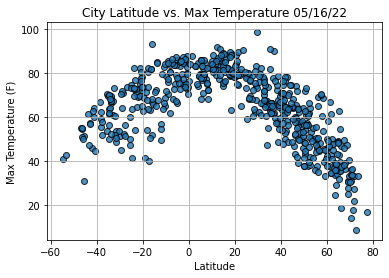

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

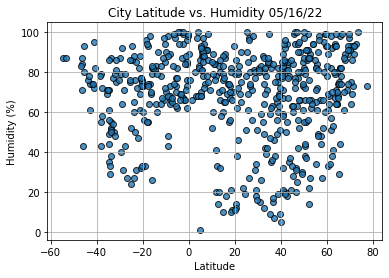

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

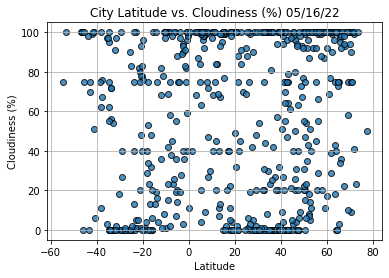

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

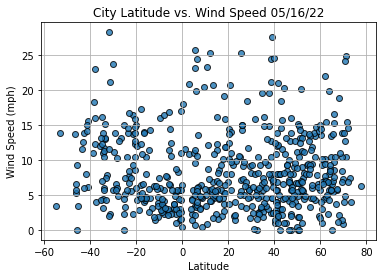

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13


City                    Cape Town
Country                        ZA
Date          2022-05-17 03:11:34
Lat                      -33.9258
Lng                       18.4232
Max Temp                    68.88
Humidity                       55
Cloudiness                     72
Wind Speed                   5.99
Name: 13, dtype: object

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-05-17 03:11:27,-21.3585,55.7679,69.39,82,82,13.73
3,Mataura,NZ,2022-05-17 03:15:28,-46.1927,168.8643,54.48,84,100,5.32
4,Huarmey,PE,2022-05-17 03:15:29,-10.0681,-78.1522,64.94,85,97,7.45
7,Ushuaia,AR,2022-05-17 03:11:31,-54.8000,-68.3000,40.66,87,75,3.44
11,Bluff,NZ,2022-05-17 03:11:33,-46.6000,168.3333,54.81,83,100,13.69


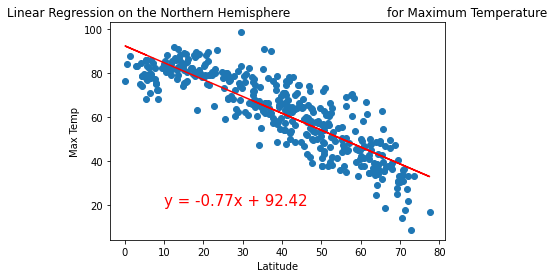

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

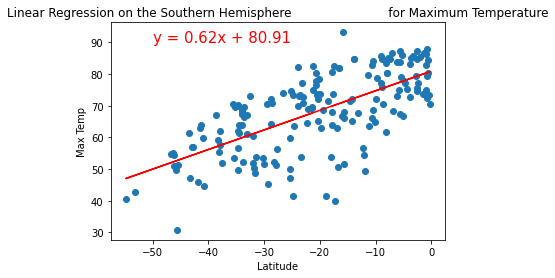

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

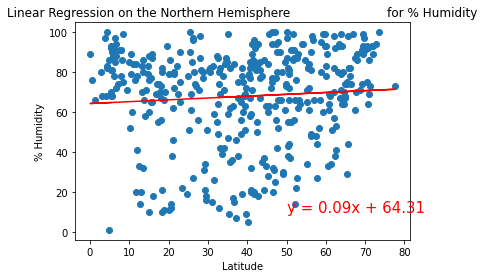

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,10))

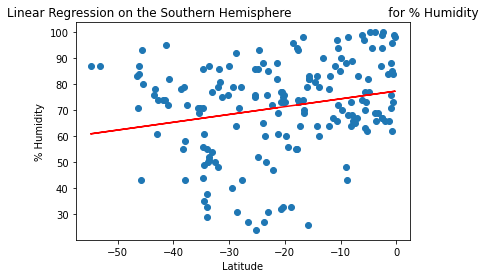

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

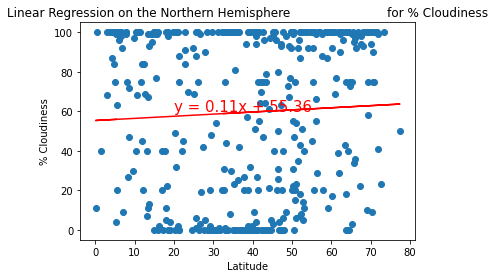

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

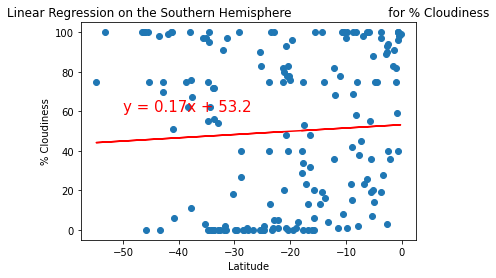

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

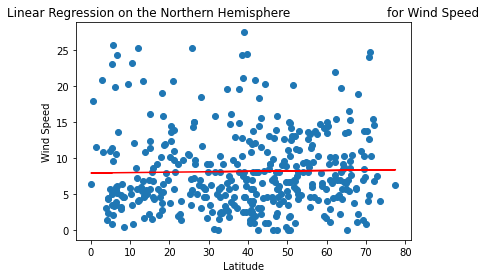

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

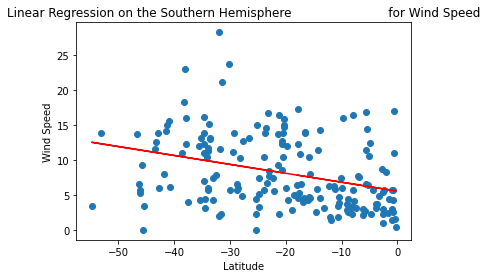

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))